<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/An%C3%A1lise_de_Dados_(Airbnb_Lisboa).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados (Airbnb - Lisboa)**
---

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)


![img](https://raw.githubusercontent.com/amadords/images/main/airbnb-lisboa.png)

O [Airbnb](https://www.airbnb.com.br/) é, sem dúvidas, a **maior empresa hoteleira da atualidade**. A empresa faz parte de uma nova cultura onde se torna a maior de um segmento sem sequer ter um bem físico para o consumo dos clientes. 

Me deixe explicar melhor: Embora seja a maior empresa hoteleira, o Airbnb não possui nenhum hotel, assim como a Uber pode ser considerada a maior no segmento de  serviço de transportes para tráfego de pessoas (táxi), porém sem possuir nenhum carro. Esse tipo de empresa tem, na verdade, todo um sistema de **logística** e **planejamento sustentável** que permite benefícios para quem trabalha em seu nome, além de, claro, a própria empresa ter seu lucro.


O Airbnb atua **conectando pessoas** que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, através de uma plataforma que torna a hospedagem alternativa.

E Março de 2019, a empresa atingiu a marca de **500 milhões de hóspedes** através de sua plataforma.

A exemplo de grandes empresas como Uber e Spotify, o Airbnb **disponibiliza dados** de algumas grande cidade ao redor do mundo através do [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde se pode baixar ou até mesmo utilizar os dados diretamente do site p'ra análises, com fim de desenvolver projetos e soluções de **Data Science** ou **Analytics** puramente.




## Sobre o projeto

Neste *notebook*, iremos analisar os dados referentes à cidade do **Rio de Janeiro**, e ver quais **insights** podem ser extraídos a partir de dados brutos. Infelizmente o Airbnb não disponibiliza dados de todas as cidades. No Brasil, por exemplo, só tem os dados (até a data de publicação deste notebook) do Rio de Janeiro - RJ, razão pela qual será feita apenas dessa cidade.

Embora seja comum na Ciência de Dados fazer sempre uma Regressão ou Classificação ao final do projeto, não iremos chegar a isso, uma vez que o objetivo é apenas analisar os dados. Isso significa também que as partes de limpeza de dados, bem como processamento de dados que podem ser vistos em nosso [github](https://github.com/amadords) ou, mais precisamente, [neste](https://github.com/amadords/Projetos-Publicos/blob/master/Pr%C3%A9_processamentos,_M%C3%A9tricas_e_Pipelines_(Pr%C3%A1tica).ipynb) notebook, também não serão executadas.

**Por que isso?**

P'ra mostrar que o Cientista também deve se apegar à análise. Uma vez que é uma parte vital de um projeto, não se deve passar levianamente, a fim de chegar nas outras fases.

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## **Análise dos Dados**

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


**Importando os dados e lendo as 5 primeiras linhas**

In [2]:
# carregando os dados
PATH = 'https://raw.githubusercontent.com/amadords/data/main/airbnb-lisboa.csv'
df = pd.read_csv(PATH)

# lendo os dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,26,2020-01-03,0.33,1,322
1,25659,Heart of Alfama - Coeur d'Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,50,3,113,2019-12-08,1.38,1,363
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,40,3,324,2020-11-01,2.65,1,340
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,25,2,264,2021-01-14,2.50,2,311
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,39,2020-12-17,0.31,1,266


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

*Observação: Este dataset é a versão "resumida" do Airbnb, contendo o nome `listings.csv` e contém 20.057 (vinte mil e cinquenta e sete) entradas de dados, com 16 (dezesseis) variáveis para explorarmos.

**Tamanho da base de dados e tipo dos dados**

In [3]:
# tamanho das base de dados

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# tipo de dado de cada coluna
display(df.dtypes)

Entradas:	 20057
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes e cuidado que se tem com eles.

É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Se sim, é importante saber o que se fazer com eles. Por isso vamos levantar alguns questionamentos.

Note, que ao contrário do dataset disponibilizado com dados do Rio de Janeiro (a análise pode ser vista [aqui](https://github.com/amadords/Projetos-Publicos/blob/master/An%C3%A1lise_de_Dados_(Airbnb_Rio_de_Janeiro).ipynb)), o sobre Lisboa está com muito menos valores ausentes.

No de Lisboa:


* As variáveis `reviews_per_month` e `last_review` possuem apenas 17% dos valores nulos.

* As variáveis `name` e `host_name` têm aproximadamente 0,05% e 0.04% dos valores nulos, respectivamente.

* As demais variáveis não contêm valores nulos.

**Ordenando em ordem decrescente as variáveis por seus valores ausentes**

In [4]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

reviews_per_month                 17.405395
last_review                       17.405395
name                               0.049858
host_name                          0.039886
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, serão plotados histogramas.

Lembre que os histogramas mostram a frequência ou a distribuição gráfica dos dados.

 Ao chamar a função **hist()** apenas os dados numéricos serão plotados.

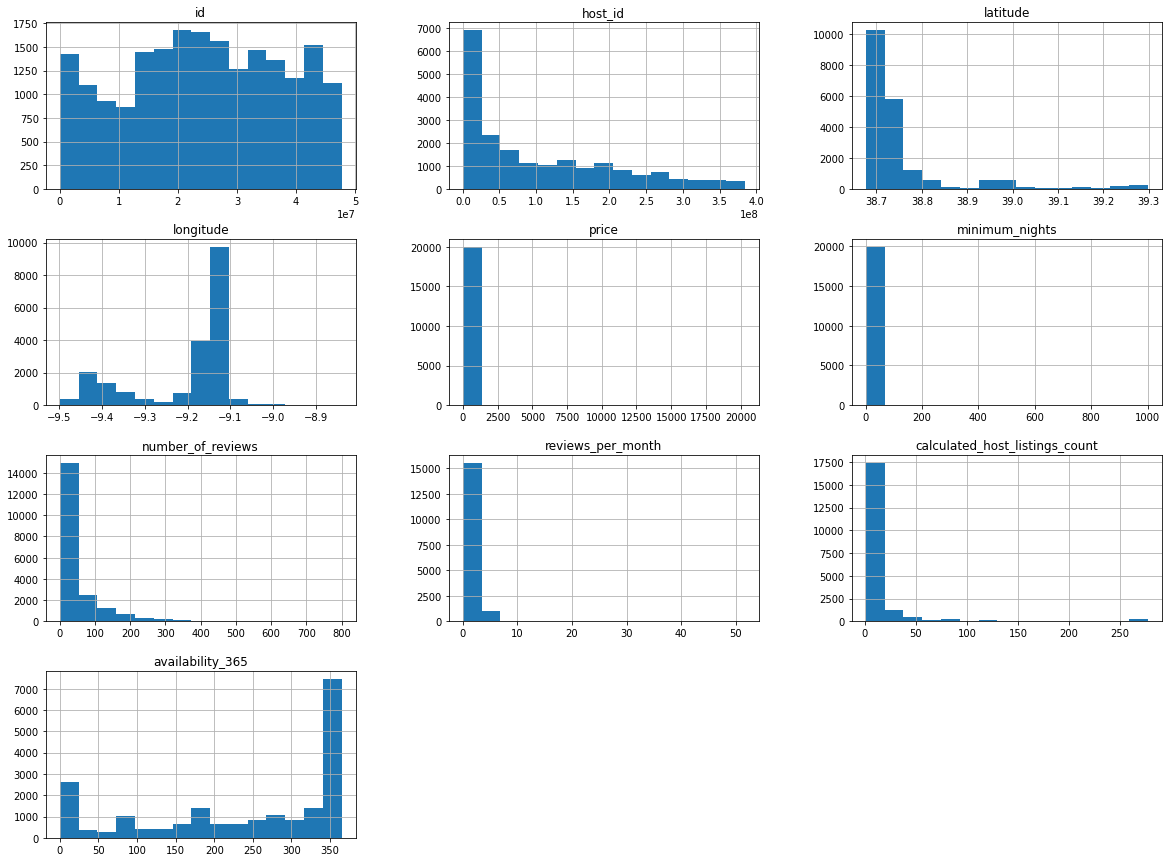

In [5]:
df.hist(bins=15, figsize=(20,15));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `reviews_per_month`.

Os valores não seguem uma distribuição, distorcendo toda a representação gráfica. Veja `price`, por exemplo. Seus valores estão quase todos em um faixa que parece corresponder aos 1750 euros. contudo, o gráfico está indo até 20000, o que significa que há algum ou alguns poucos dados fora do padrão estão em torno desse valor. Talvez um pouco acima, talvez um pouco abaixo.

Para confirmar o que está sendo dito, há duas maneiras rápidas e simples que auxiliam a detecção de *outliers*:

* Resumo estatístico por meio do método `describe()`.
* Plotar `boxplots` para a variável.

**Resumo estatístico das variáveis numéricas**


In [6]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20057.000000,20057.000000,20057.000000,16566.000000,20057.000000,20057.000000
mean,96.053946,3.690731,42.996261,1.195755,13.244403,238.557910
std,266.087137,15.661970,67.862040,1.312889,35.789582,130.053911
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.000000,1.000000,2.000000,0.250000,1.000000,138.000000
50%,60.000000,2.000000,13.000000,0.760000,3.000000,287.000000
75%,92.000000,3.000000,55.000000,1.780000,10.000000,360.000000
max,20282.000000,1000.000000,800.000000,51.610000,277.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 92, porém seu valor máximo é 20282, motivo para termos lá no histograma aquele valor anômalo de 20.000 na frequência.

**Boxplot para minimum_nights**

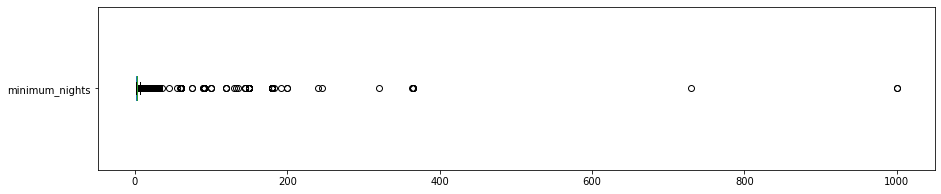

minimum_nights: valores acima de 15:
485 entradas
2.4181%


In [7]:
# boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# quantidade de valores acima de 15 dias para minimum_nights
print("minimum_nights: valores acima de 15:")
print("{} entradas".format(len(df[df.minimum_nights > 15])))
print("{:.4f}%".format((len(df[df.minimum_nights > 15]) / df.shape[0])*100))

**Boxplot para price**

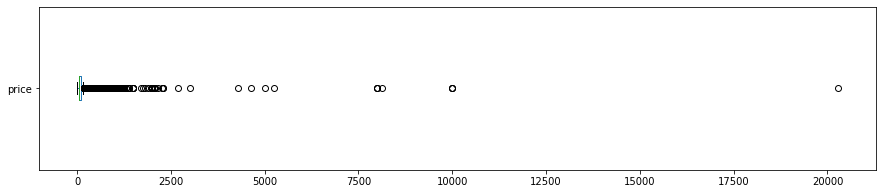


price: valores acima de 750
222 entradas
1.1068%


In [8]:
# boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# quantidade de valores acima de 750 para price
print("\nprice: valores acima de 750")
print("{} entradas".format(len(df[df.price > 750])))
print("{:.4f}%".format((len(df[df.price > 750]) / df.shape[0])*100))


**Veja a diferença sem esse valores anômalos atrapalhando o gráfico**

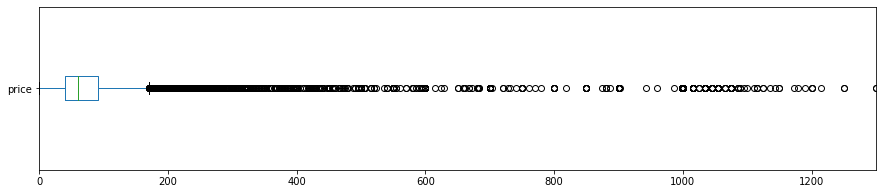

In [9]:
df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

**Histogramas sem *outliers***

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

Veja que isso é o mínimo que pode ser feito nos tratamentos de dados, tanto que nem considerei como uma fase de pré-processamento ou limpeza dos dados. O trabalho com pré-processamento, principalmente quando vão ser entregues a algoritmos levam de 70-80% do tempo do trabalho de um Cientista de Dados.

Um novo DataFrame será criado para manter o original sem alterações.

In [10]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 750].index, axis=0, inplace=True) # price
df_clean.drop(df_clean[df_clean.minimum_nights > 15].index, axis=0, inplace=True) # minimum_nights

# removendo `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

**Plotando o histograma após a "limpeza"**

Note a diferença entre as variáveis antes e depois.

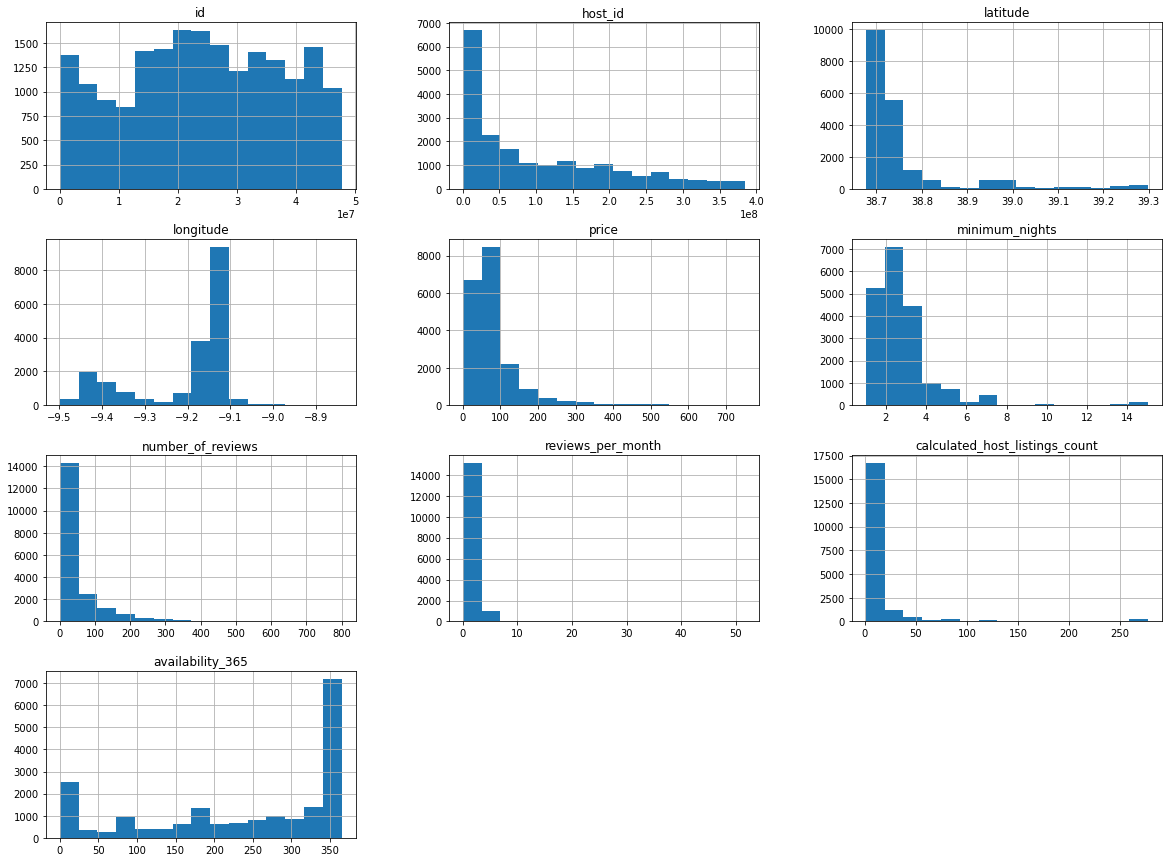

In [11]:
df_clean.hist(bins=15, figsize=(20,15));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Importante salientar que **correleção não é causa**. Embora seja um indicativo interessante, é importante fazer essa diferenciação. Por exemplo, é comum o preço de um imóvel ser mais caro à medida que se aumenta o tamanho dos cômodos. A correlação é forte nesse caso, mas isso não significa necessariamente que o preço é alto porque o número de cômodos é alto também. 

Essa relação pode ser medida e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação.
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

**Criando uma matriz de correlação**


In [12]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.063436,-0.141869,-0.165798,-0.005425,0.026422
minimum_nights,0.063436,1.000000,-0.032159,-0.105122,-0.074029,-0.048959
number_of_reviews,-0.141869,-0.032159,1.000000,0.794909,-0.086856,-0.005531
reviews_per_month,-0.165798,-0.105122,0.794909,1.000000,-0.090980,-0.004805
calculated_host_listings_count,-0.005425,-0.074029,-0.086856,-0.090980,1.000000,0.067861
availability_365,0.026422,-0.048959,-0.005531,-0.004805,0.067861,1.000000


**Gráfico Heatmap**

Ou seja, *mapa de calor*. Veja que na diagonal princiapl estão os valores onde a correlação é 1.00, ou seja, há 100% de correlação.

Claro, pois estamos fazendo a correlação de uma variável com ela mesmo.

Veja que quase não há correlação entre as variáveis. Apenas `number_of_reviews` e `reviews_per_month` têm alguma correlação, correlação essa, um tanto razoável.

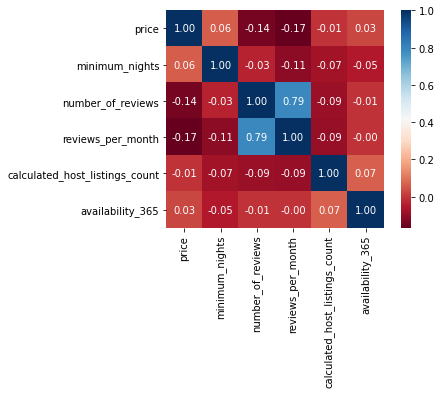

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. 

Uma vez que pessoas alugam desde a sala de sua casa até uma casa ou apartamento inteiro, há uma variação até considerável dos tipos de locação presentes no site.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

**Quantidade de cada tipo de imóvel disponível**

In [14]:
df_clean.room_type.value_counts()

Entire home/apt    14413
Private room        4181
Hotel room           406
Shared room          350
Name: room_type, dtype: int64

**Porcentagem de cada tipo de imóvel disponível**


In [15]:
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    74.485788
Private room       21.607235
Hotel room          2.098191
Shared room         1.808786
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Lisboa?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()` e é um dos métodos mais utilizados para fazer a **Análise de Dados** ou mesmo **consultas SQL**.

No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

**Comparando `neighbourhood` com `price`**

In [16]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Azambuja                                    317.500000
Freiria                                     290.000000
Cardosas                                    280.000000
Aveiras de Baixo                            274.500000
Ota                                         249.000000
Alguber                                     220.000000
Alhandra, So Joo dos Montes e Calhandriz    218.888889
Vermelha                                    191.500000
Bucelas                                     180.333333
Vale do Paraso                              170.000000
Name: price, dtype: float64

Acima, vemos que bairros como **Azambuja**, **Freiria** e **Cardosas** são bairros com maior média de preço, ao passo que bairros luxuosos como **Alfama**, **Estrela**, **Misercórdia** e **Santo António** sequer aparecem na base de dados, mostrando claramente que pessoas que moram em bairros nobres não utilizam o serviço.

**Quantidade de imóveis no Azambuja**

In [17]:
# quantidade de imóveis no Azambuja
print('Número de Entradas:', df_clean[df_clean.neighbourhood == "Azambuja"].shape[0])

# visualizando as entradas
df_clean[df_clean.neighbourhood == "Azambuja"]

Número de Entradas: 2


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3236,8399727,Casa do Alfaro,44253397,Rodrigo,Azambuja,39.09760,-8.90530,Entire home/apt,600,3,3,2017-10-07,0.06,1,269
16209,38071293,Casa da Rainha - Azambuja,288897396,Inês,Azambuja,39.06735,-8.86967,Private room,35,1,0,NaN,NaN,1,179


**Quantidade de imóveis em Freiria**


In [18]:
# quantidade de imóveis no Freiria 
print('Número de Entradas:', df_clean[df_clean.neighbourhood == "Freiria"].shape[0])

# visualizando as entradas
df_clean[df_clean.neighbourhood == "Freiria"]

Número de Entradas: 2


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4658,13403420,"Great villa near Ericeira swimming pool, jacuzzi",62121230,Lina,Freiria,39.03564,-9.34570,Entire home/apt,520,3,7,2020-08-21,0.19,1,360
13563,32125496,Casa Freiria Tour,241022718,Natalia,Freiria,39.02471,-9.31984,Entire home/apt,60,2,3,2020-08-23,0.17,1,365


**Quantidade de imóveis no Cardosas**

In [19]:
# quantidade de imóveis no Cardosas
print('Número de Entradas:', df_clean[df_clean.neighbourhood == "Cardosas"].shape[0])

# visualizando as entradas
df_clean[df_clean.neighbourhood == "Cardosas"] 

Número de Entradas: 1


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
8609,21510142,Casal do Portinho # 15/20PAX 30min LISBOA,150414336,Patricia,Cardosas,38.97631,-9.03844,Entire home/apt,280,2,43,2020-12-26,1.1,1,294


**Veja**

Juntando os quatro bairros temos um total de 5 (cinco) entradas em um total de 19.915 (dezenove mil novecentos e quinze), como pode ser visto abaixo na base de dados.

As poucas entradas mostram, em uma análise superficial, que há valores que elevam a média p'ra muito além do que se espera desses lugares.

In [20]:
df_clean.shape

(19350, 15)

**Para finalizar**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto em um gráfico. Considerando `x=longitude` e `y=latitude`.

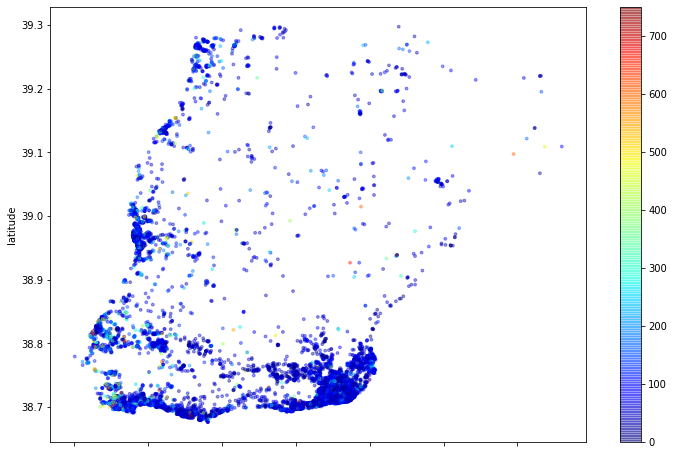

In [21]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conclusões**

A análise feita foi superficial, contudo já deu para se perceber que existem outliers em algumas das variáveis.

Além disso, também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos, caso não seja feita uma análise mais precisa e profunda.

*Observação: O dataset é uma versão resumida (ideal apenas para uma abordagem inicial). Em uma próxima análise exploratória, é interessante utilizar o conjunto de dados completos, com muito mais atributos disponíveis.*

# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-cyan.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-white.svg)](https://daniel-s-amador.medium.com/)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>